In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
dataset_dir = "./archive1/"
output_dir = "./New Data1"

# Categories
categories = ["without_mask", "incorrect_mask", "with_mask"]

# Create output directories
for split in ["train", "val", "test"]:
    for category in categories:
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# Split data
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    images = os.listdir(category_path)
    
    # Split into train (80%) and test+val (20%)
    train_images, test_val_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Split test+val (20%) into validation (10%) and test (10%)
    val_images, test_images = train_test_split(test_val_images, test_size=0.5, random_state=42)  # 0.5 splits 20% into 10% each
    
    # Move images
    for image in train_images:
        shutil.move(os.path.join(category_path, image), os.path.join(output_dir, "train", category, image))
    for image in val_images:
        shutil.move(os.path.join(category_path, image), os.path.join(output_dir, "val", category, image))
    for image in test_images:
        shutil.move(os.path.join(category_path, image), os.path.join(output_dir, "test", category, image))

print("Dataset split into train (80%), validation (10%), and test (10%) sets completed!")


Dataset split into train (80%), validation (10%), and test (10%) sets completed!


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array # type: ignore
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from tensorflow.keras.models import load_model # type: ignore

model = load_model('./training/vgg16/vgg16_fintune2_3.h5')

img_url = ['https://imgs.search.brave.com/EtbUs9eQBxXmI57ays5oLBYWWCluJXhDjyvSF_rIEHA/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvMTI3/ODEzOTU2OC9waG90/by9zdHVkaW8tcG9y/dHJhaXQtb2YtMjAt/eWVhci1vbGQtd29t/YW4uanBnP3M9NjEy/eDYxMiZ3PTAmaz0y/MCZjPUZTRWRYNkVH/S3JqYkN2T0prOWlk/aVlaSm9TRXJBOWJ3/aXpIRWtXODZBM2M9',
           'https://imgs.search.brave.com/A-DpXlEKQmNpOJaSx87nHSnbvRW7aHicQinxaMfS-i8/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvMTI2/MzA4ODk4NS9waG90/by93b21hbi13ZWFy/aW5nLXN1cmdpY2Fs/LW1hc2stYW5kLXNt/aWxpbmcuanBnP3M9/NjEyeDYxMiZ3PTAm/az0yMCZjPThydGhL/ZEVqazNEWWRMZGVr/dlRza1JRejNPZFJP/SHBGWENzWElPLTV2/MjQ9',
           'https://images.ctfassets.net/1ny4yoiyrqia/3Sk1bzqC52xPwk1lbXSVxs/516bc9fc458271eb0fcf37e5161c2155/prevent-face-mask-problems-ear-soreness.png?fm=webp&w=450&h=450',
           'https://imgs.search.brave.com/xXaZnYkX7XOV5KbLpqRa1yfxtl0x4te2hK_EXXKR7Z0/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9pbWFn/ZXMuY3RmYXNzZXRz/Lm5ldC9jbnUwbThy/ZTFleGUvM0hZVGJq/bHhsNmI5Qms5QVRK/MlAxTC9kODQ3ZGZj/YzRiOTBiNzU4NDc1/NTNmNGJlOTE2YjQy/MS9zaHV0dGVyc3Rv/Y2tfMTcwNDQ2NTAx/MC5qcGc_Zm09anBn/JmZsPXByb2dyZXNz/aXZlJnc9NjYwJmg9/NDMzJmZpdD1maWxs',
           'https://imgs.search.brave.com/zFDj4_bP2jdczeFquWyHL7e-Z5hD__jq7LQIw5gkWEw/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvMTI1/MjQ3MzU4OS9waG90/by95b3VuZy13b21h/bi13ZWFyaW5nLXN1/cmdpY2FsLW1hc2st/aW4tZnJvbnQtb2Yt/aG9tZS5qcGc_cz02/MTJ4NjEyJnc9MCZr/PTIwJmM9NjA0cGxM/T2x4bkJ6RXFKbXNI/NC1zY0JXckx4WG1x/dWY1ZlVEWVZycmwt/dz0']

for i in img_url:
    response = requests.get(i)
    img = Image.open(BytesIO(response.content)).resize((224, 224))

    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)

    print("Predicted class probabilities:", predictions)

    predicted_class = np.argmax(predictions, axis=1)
    print("Predicted class:", predicted_class)

    class_indices = train_generator.class_indices
    print("Class indices (label names):", class_indices)

    index_to_class = {v: k for k, v in class_indices.items()}

    predicted_class_name = index_to_class[predicted_class[0]]
    print("Predicted class name:", predicted_class_name,'\n')

1/1 [==============================] - 0s 171ms/step
Predicted class probabilities: [[2.9239692e-03 7.6223216e-05 9.9699980e-01]]
Predicted class: [2]
Class indices (label names): {'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2}
Predicted class name: without_mask 

1/1 [==============================] - 0s 36ms/step
Predicted class probabilities: [[1.6338789e-04 9.7432083e-01 2.5515711e-02]]
Predicted class: [1]
Class indices (label names): {'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2}
Predicted class name: with_mask 

1/1 [==============================] - 0s 32ms/step
Predicted class probabilities: [[0.23525403 0.02537119 0.73937476]]
Predicted class: [2]
Class indices (label names): {'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2}
Predicted class name: without_mask 

1/1 [==============================] - 0s 36ms/step
Predicted class probabilities: [[9.8853391e-01 1.0905828e-02 5.6018325e-04]]
Predicted class: [0]
Class indices (label names): {'incorrect_m

In [8]:
import os
import shutil

# Define source and destination folders
folder1 = "./data/incorrect_mask/mc/"
folder2 = "./data/incorrect_mask/mmc/"
destination = "./data/incorrect_mask/"

# Create the destination folder if it doesn't exist
os.makedirs(destination, exist_ok=True)

# Function to copy files with unique names
def copy_files_with_unique_names(src_folder, dest_folder, prefix):
    for filename in os.listdir(src_folder):
        src_path = os.path.join(src_folder, filename)
        
        # Ensure the file is an image
        if os.path.isfile(src_path):
            # Add a unique prefix or suffix to avoid overwriting
            new_filename = f"{prefix}_{filename}"
            dest_path = os.path.join(dest_folder, new_filename)
            
            # Copy file to destination
            shutil.copy2(src_path, dest_path)

# Copy files from both folders with unique prefixes
copy_files_with_unique_names(folder1, destination, "folder1")
copy_files_with_unique_names(folder2, destination, "folder2")

print("Files merged successfully without replacing!")


Files merged successfully without replacing!


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore
from sklearn.utils import class_weight
import numpy as np

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
)

# Rescaling for validation data (no augmentation)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    './New Data/train',
    target_size=(299, 299),
    batch_size=2,
    class_mode='categorical'
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    './New Data/val/',
    target_size=(299, 299),
    batch_size=2,
    class_mode='categorical'
)

# Compute class weights for handling imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert class weights to a dictionary format
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 10171 images belonging to 3 classes.
Found 2183 images belonging to 3 classes.
Class Weights: {0: 0.9689435076688577, 1: 1.011737789714513, 2: 1.0208772458094952}


In [5]:
from tensorflow.keras.applications import Xception # type: ignore
from tensorflow.keras import layers, models # type: ignore

xception_base = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

model = models.Sequential()
model.add(xception_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

for layer in xception_base.layers:
    layer.trainable = False

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 47,076,395
Trainable params: 47,021,867
Non-trainable params: 54,528
_________________________________________________________________


In [6]:
from tensorflow.keras.models import load_model

# model = load_model('./training1/xception_intermediate1.h5')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=1,
    # callbacks=[early_stop],
)

model.save('./training1/xception_intermediate1.h5')

831/831 [==============================] - 104s 109ms/step - loss: 2.2806 - accuracy: 0.8700 - val_loss: 0.2186 - val_accuracy: 0.9423


In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('./training/xception_fintune3_6.h5')

for layer in model.layers[0].layers:
    layer.trainable = True

model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=4
)

model.save('./training/xception_fintune3_7.h5')

4070/4070 [==============================] - 577s 139ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.4960 - val_accuracy: 0.8884


Found 209 images belonging to 3 classes.

Evaluating model: ./training1/xception_intermediate1.h5
209/209 [==============================] - 6s 24ms/step
Inference time per image: 0.0316 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       0.96      0.97      0.97        71
     with_mask       0.98      0.93      0.96        69
  without_mask       0.96      1.00      0.98        69

      accuracy                           0.97       209
     macro avg       0.97      0.97      0.97       209
  weighted avg       0.97      0.97      0.97       209



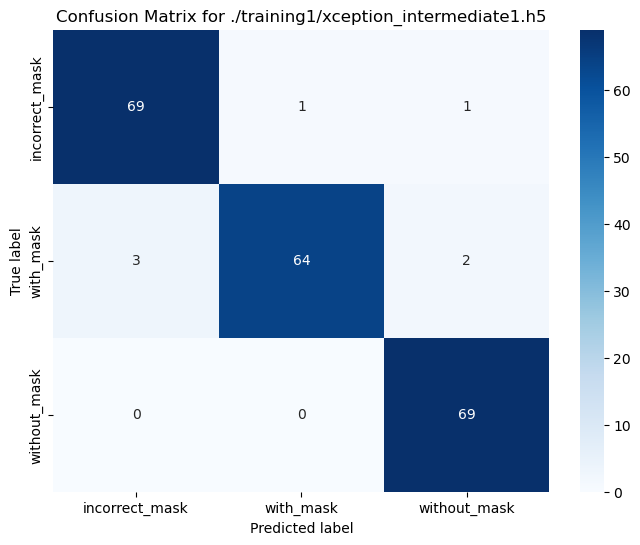

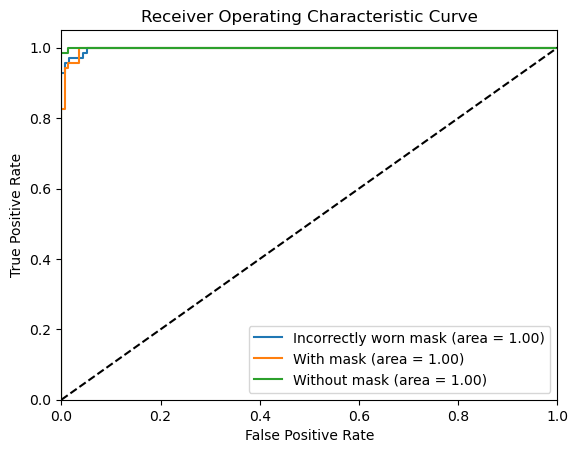

In [8]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model_paths = [
    './training/xception_intermediate1.h5'
]

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './New Data1/test/',
    target_size=(299, 299),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0,1,2])
    n_classes = y_true_bin.shape[1]
    classes = y_true_bin

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    custom_labels = ['Incorrectly worn mask', 'With mask', 'Without mask']

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{custom_labels[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
4070/4070 [==============================] - 346s 80ms/step - loss: 0.7586 - accuracy: 0.9256 - val_loss: 0.6696 - val_accuracy: 0.8692
4070/4070 [==============================] - 274s 67ms/step - loss: 0.2162 - accuracy: 0.9522 - val_loss: 0.9014 - val_accuracy: 0.8427
4070/4070 [==============================] - 274s 65ms/step - loss: 0.1593 - accuracy: 0.9633 - val_loss: 0.6352 - val_accuracy: 0.8540
4070/4070 [==============================] - 269s 65ms/step - loss: 0.1724 - accuracy: 0.9676 - val_loss: 2.1880 - val_accuracy: 0.7871
4070/4070 [==============================] - 266s 63ms/step - loss: 0.1708 - accuracy: 0.9611 - val_loss: 1.1094 - val_accuracy: 0.8181

4070/4070 [==============================] - 271s 65ms/step - loss: 0.1647 - accuracy: 0.9698 - val_loss: 1.3746 - val_accuracy: 0.8225
4070/4070 [==============================] - 278s 66ms/step - loss: 0.1413 - accuracy: 0.9705 - val_loss: 2.7423 - val_accuracy: 0.8225


4070/4070 [==============================] - 554s 131ms/step - loss: 0.3348 - accuracy: 0.8641 - val_loss: 0.4326 - val_accuracy: 0.8702
4070/4070 [==============================] - 570s 137ms/step - loss: 0.0930 - accuracy: 0.9710 - val_loss: 0.6855 - val_accuracy: 0.8668
4070/4070 [==============================] - 404s 97ms/step - loss: 0.0601 - accuracy: 0.9816 - val_loss: 0.8415 - val_accuracy: 0.8673
4070/4070 [==============================] - 383s 92ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.5525 - val_accuracy: 0.8864
4070/4070 [==============================] - 385s 93ms/step - loss: 0.0334 - accuracy: 0.9908 - val_loss: 0.5893 - val_accuracy: 0.8496
4070/4070 [==============================] - 392s 94ms/step - loss: 0.0263 - accuracy: 0.9904 - val_loss: 0.6503 - val_accuracy: 0.8623
4070/4070 [==============================] - 577s 139ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.4960 - val_accuracy: 0.8884


SyntaxError: invalid decimal literal (587224683.py, line 1)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore
from sklearn.utils import class_weight
import numpy as np

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
)

# Rescaling for validation data (no augmentation)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    './New Data/train',
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical'
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    './New Data/val/',
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical'
)

# Compute class weights for handling imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert class weights to a dictionary format
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 10171 images belonging to 3 classes.
Found 2183 images belonging to 3 classes.
Class Weights: {0: 0.9689435076688577, 1: 1.011737789714513, 2: 1.0208772458094952}


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16 # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

model = models.Sequential()
model.add(vgg16_base)

model = models.Sequential()
model.add(vgg16_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 17,926,467
Trainable params: 3,211,779
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
from tensorflow.keras.models import load_model

model = load_model('./training/vgg16/vgg16_intermediate6.h5')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=1,
    # callbacks=[early_stop],
)

model.save('./training/vgg16/vgg16_intermediate7.h5')

4070/4070 [==============================] - 183s 45ms/step - loss: 0.1143 - accuracy: 0.9624 - val_loss: 1.9071 - val_accuracy: 0.6898


In [9]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('./training/vgg16/vgg16_fintune2_2.h5')

for layer in model.layers[0].layers:
    layer.trainable = True

model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=4
)

model.save('./training/vgg16/vgg16_fintune2_3.h5')

5086/5086 [==============================] - 447s 88ms/step - loss: 0.0718 - accuracy: 0.9760 - val_loss: 0.0523 - val_accuracy: 0.9858


In [20]:
4070/4070 [==============================] - 183s 45ms/step - loss: 0.1897 - accuracy: 0.9338 - val_loss: 1.2287 - val_accuracy: 0.7153
4070/4070 [==============================] - 190s 47ms/step - loss: 0.1582 - accuracy: 0.9463 - val_loss: 0.9012 - val_accuracy: 0.7094
4070/4070 [==============================] - 183s 45ms/step - loss: 0.1378 - accuracy: 0.9536 - val_loss: 1.2088 - val_accuracy: 0.7242
4070/4070 [==============================] - 182s 44ms/step - loss: 0.1322 - accuracy: 0.9555 - val_loss: 1.3846 - val_accuracy: 0.7365
4070/4070 [==============================] - 181s 44ms/step - loss: 0.1276 - accuracy: 0.9560 - val_loss: 1.4966 - val_accuracy: 0.7252
4070/4070 [==============================] - 181s 44ms/step - loss: 0.1153 - accuracy: 0.9643 - val_loss: 1.2506 - val_accuracy: 0.7252
4070/4070 [==============================] - 183s 45ms/step - loss: 0.1143 - accuracy: 0.9624 - val_loss: 1.9071 - val_accuracy: 0.6898


4070/4070 [==============================] - 322s 78ms/step - loss: 0.1103 - accuracy: 0.9650 - val_loss: 0.7286 - val_accuracy: 0.7861
4070/4070 [==============================] - 320s 78ms/step - loss: 0.0681 - accuracy: 0.9797 - val_loss: 0.4391 - val_accuracy: 0.8673
4070/4070 [==============================] - 366s 89ms/step - loss: 0.0558 - accuracy: 0.9834 - val_loss: 0.8407 - val_accuracy: 0.8451

5086/5086 [==============================] - 461s 90ms/step - loss: 0.1526 - accuracy: 0.9466 - val_loss: 0.0657 - val_accuracy: 0.9826
5086/5086 [==============================] - 464s 91ms/step - loss: 0.0918 - accuracy: 0.9689 - val_loss: 0.0456 - val_accuracy: 0.9858


SyntaxError: invalid decimal literal (1185041529.py, line 1)

Found 2075 images belonging to 3 classes.

Evaluating model: ./training/vgg16/vgg16_fintune2_3.h5
2075/2075 [==============================] - 27s 13ms/step
Inference time per image: 0.0134 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       0.99      0.51      0.67       529
     with_mask       0.87      0.98      0.92       992
  without_mask       0.78      0.96      0.86       554

      accuracy                           0.86      2075
     macro avg       0.88      0.82      0.82      2075
  weighted avg       0.88      0.86      0.84      2075



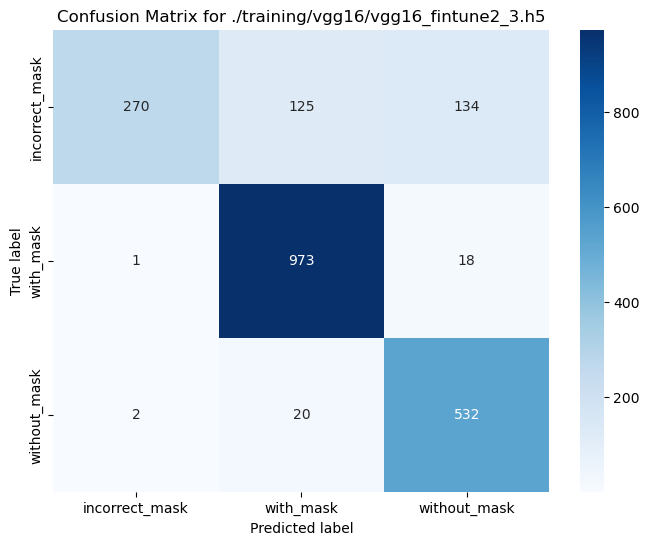

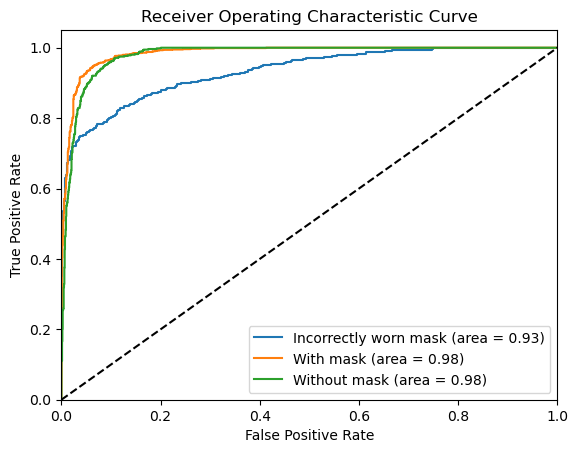

In [10]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model_paths = [
    './training/vgg16/vgg16_fintune2_3.h5'
]

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './latest-build/',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0,1,2])
    n_classes = y_true_bin.shape[1]
    classes = y_true_bin

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    custom_labels = ['Incorrectly worn mask', 'With mask', 'Without mask']

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{custom_labels[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

In [14]:
from tensorflow.keras.applications import VGG19 # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
import tensorflow as tf

vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(vgg19_base)

model = models.Sequential()
model.add(vgg19_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

for layer in vgg19_base.layers:
    layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 23,236,163
Trainable params: 3,211,779
Non-trainable params: 20,024,384
_________________________________________________________________


In [9]:
from tensorflow.keras.models import load_model

model = load_model('./training/vgg19/vgg19_intermediate4.h5')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=2,
)

model.save('./training/vgg19/vgg19_intermediate5.h5')


5086/5086 [==============================] - 395s 77ms/step - loss: 0.2270 - accuracy: 0.9199 - val_loss: 0.1900 - val_accuracy: 0.9354


In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('./training/vgg19/vgg19_fintune4_4.h5')

for layer in model.layers[0].layers:
    layer.trainable = True

model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=2
)

model.save('./training/vgg19/vgg19_fintune4_5.h5')

5086/5086 [==============================] - 510s 100ms/step - loss: 0.0685 - accuracy: 0.9785 - val_loss: 0.0362 - val_accuracy: 0.9881


In [ ]:
5086/5086 [==============================] - 419s 82ms/step - loss: 0.4415 - accuracy: 0.8325 - val_loss: 0.2096 - val_accuracy: 0.9235
5086/5086 [==============================] - 328s 64ms/step - loss: 0.2992 - accuracy: 0.8918 - val_loss: 0.1515 - val_accuracy: 0.9469
5086/5086 [==============================] - 461s 87ms/step - loss: 0.2611 - accuracy: 0.9054 - val_loss: 0.1503 - val_accuracy: 0.9496
5086/5086 [==============================] - 361s 71ms/step - loss: 0.2344 - accuracy: 0.9147 - val_loss: 0.1336 - val_accuracy: 0.9528
5086/5086 [==============================] - 395s 77ms/step - loss: 0.2270 - accuracy: 0.9199 - val_loss: 0.1900 - val_accuracy: 0.9354

5086/5086 [==============================] - 532s 104ms/step - loss: 0.1492 - accuracy: 0.9520 - val_loss: 0.0477 - val_accuracy: 0.9853
5086/5086 [==============================] - 549s 108ms/step - loss: 0.0943 - accuracy: 0.9685 - val_loss: 0.0763 - val_accuracy: 0.9780
5086/5086 [==============================] - 533s 102ms/step - loss: 0.0817 - accuracy: 0.9718 - val_loss: 0.0584 - val_accuracy: 0.9858
5086/5086 [==============================] - 521s 102ms/step - loss: 0.0757 - accuracy: 0.9750 - val_loss: 0.0714 - val_accuracy: 0.9863
5086/5086 [==============================] - 510s 100ms/step - loss: 0.0685 - accuracy: 0.9785 - val_loss: 0.0362 - val_accuracy: 0.9881


Found 2079 images belonging to 3 classes.

Evaluating model: ./training/vgg19/vgg19_fintune4_5.h5
2079/2079 [==============================] - 48s 22ms/step
Inference time per image: 0.0240 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       0.97      0.33      0.49       703
     with_mask       0.72      0.98      0.83       690
  without_mask       0.76      0.99      0.86       686

      accuracy                           0.76      2079
     macro avg       0.81      0.77      0.73      2079
  weighted avg       0.82      0.76      0.72      2079



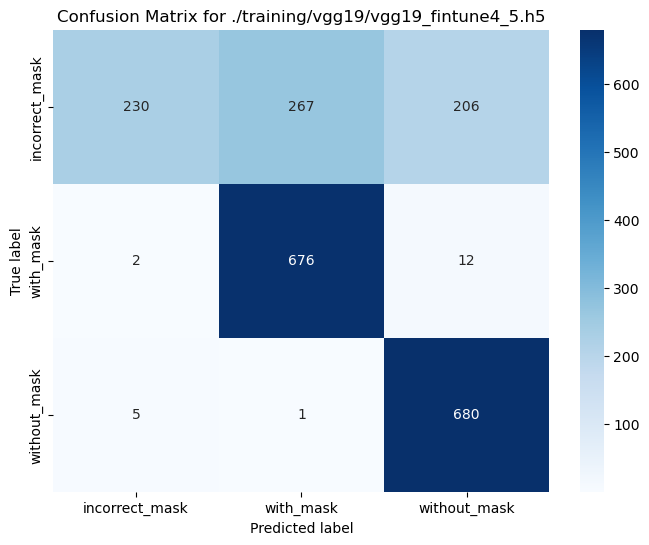

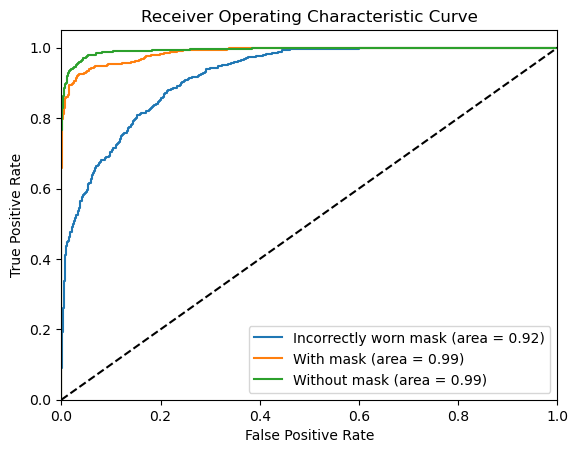

In [4]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model_paths = [
    './training/vgg19/vgg19_fintune4_5.h5'
]

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './archive1/dataset/',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0,1,2])
    n_classes = y_true_bin.shape[1]
    classes = y_true_bin

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    custom_labels = ['Incorrectly worn mask', 'With mask', 'Without mask']

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{custom_labels[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50 # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

for layer in base_model.layers:
    layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 36,433,283
Trainable params: 12,845,571
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
from tensorflow.keras.models import load_model

model = load_model('./training/resnet/resnet_intermediate5.h5')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=2,
)

model.save('./training/resnet/resnet_intermediate6.h5')

5086/5086 [==============================] - 401s 77ms/step - loss: 1.0989 - accuracy: 0.3329 - val_loss: 1.0986 - val_accuracy: 0.3294


In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('./training/resnet/resnet_fintune5_3.h5')

for layer in model.layers[0].layers:
    layer.trainable = True

model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=2
)

model.save('./training/resnet/resnet_fintune5_4.h5')

1271/5086 [======>.......................] - ETA: 5:04 - loss: 0.0984 - accuracy: 0.9772

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5086/5086 [==============================] - 533s 101ms/step - loss: 0.0833 - accuracy: 0.9764 - val_loss: 0.0603 - val_accuracy: 0.9872


In [17]:
5086/5086 [==============================] - 438s 85ms/step - loss: 1.1739 - accuracy: 0.3384 - val_loss: 1.0994 - val_accuracy: 0.3266
5086/5086 [==============================] - 474s 92ms/step - loss: 1.1004 - accuracy: 0.3254 - val_loss: 1.0992 - val_accuracy: 0.3294
5086/5086 [==============================] - 460s 89ms/step - loss: 1.1020 - accuracy: 0.3337 - val_loss: 1.0996 - val_accuracy: 0.3266
5086/5086 [==============================] - 421s 82ms/step - loss: 1.0991 - accuracy: 0.3230 - val_loss: 1.0984 - val_accuracy: 0.3440
5086/5086 [==============================] - 393s 76ms/step - loss: 1.0990 - accuracy: 0.3295 - val_loss: 1.0984 - val_accuracy: 0.3440
5086/5086 [==============================] - 401s 77ms/step - loss: 1.0989 - accuracy: 0.3329 - val_loss: 1.0986 - val_accuracy: 0.3294

5086/5086 [==============================] - 632s 122ms/step - loss: 0.2415 - accuracy: 0.9096 - val_loss: 0.0740 - val_accuracy: 0.9757
5086/5086 [==============================] - 711s 135ms/step - loss: 0.1113 - accuracy: 0.9662 - val_loss: 0.1209 - val_accuracy: 0.9689
5086/5086 [==============================] - 506s 95ms/step - loss: 0.0905 - accuracy: 0.9705 - val_loss: 0.1190 - val_accuracy: 0.9734
5086/5086 [==============================] - 533s 101ms/step - loss: 0.0833 - accuracy: 0.9764 - val_loss: 0.0603 - val_accuracy: 0.9872


SyntaxError: invalid decimal literal (309609371.py, line 1)

Found 2182 images belonging to 3 classes.

Evaluating model: ./training/resnet/resnet_fintune5_4.h5
2182/2182 [==============================] - 52s 23ms/step
Inference time per image: 0.0252 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       0.99      0.99      0.99       750
     with_mask       0.99      0.98      0.98       719
  without_mask       0.98      0.99      0.98       713

      accuracy                           0.99      2182
     macro avg       0.99      0.99      0.99      2182
  weighted avg       0.99      0.99      0.99      2182



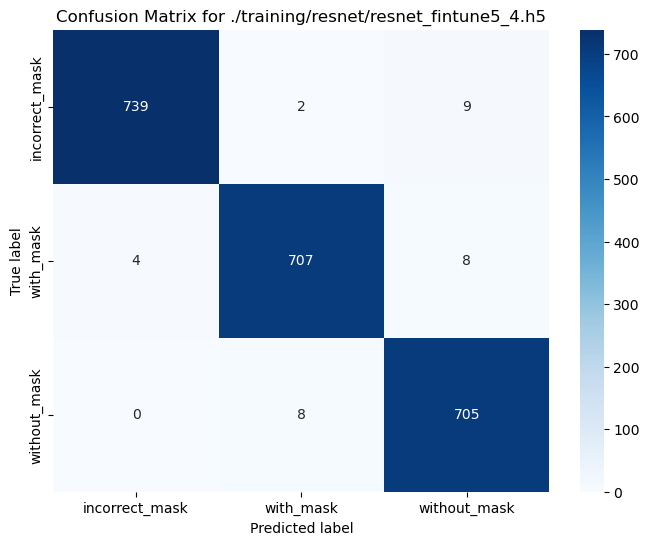

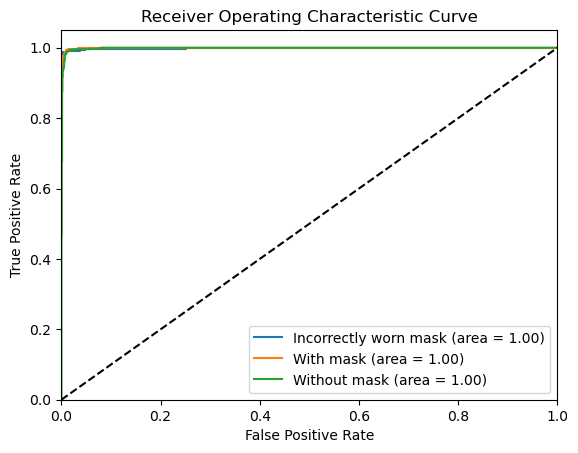

In [3]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model_paths = [
    './training/resnet/resnet_fintune5_4.h5'
]

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './New Data/test/',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0,1,2])
    n_classes = y_true_bin.shape[1]
    classes = y_true_bin

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    custom_labels = ['Incorrectly worn mask', 'With mask', 'Without mask']

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{custom_labels[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

In [2]:
from tensorflow.keras.applications import Xception  # type: ignore
from tensorflow.keras import layers, models  # type: ignore

# Initialize Xception with random weights
xception_base = Xception(weights=None, include_top=False, input_shape=(299, 299, 3))

model = models.Sequential()
model.add(xception_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 47,076,395
Trainable params: 47,021,867
Non-trainable params: 54,528
_________________________________________________________________


In [2]:
from tensorflow.keras.models import load_model

model = load_model('./training/exception/exception1.h5')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=2,
)

model.save('./training/exception/exception2.h5')

3884/5086 [=====================>........] - ETA: 2:26 - loss: 0.8389 - accuracy: 0.5942

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5086/5086 [==============================] - 657s 126ms/step - loss: 0.8164 - accuracy: 0.6139 - val_loss: 1.0935 - val_accuracy: 0.6807


Found 2075 images belonging to 3 classes.

Evaluating model: ./training/exception/exception1.h5
2075/2075 [==============================] - 30s 14ms/step
Inference time per image: 0.0151 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       0.46      0.40      0.43       529
     with_mask       0.61      0.06      0.12       992
  without_mask       0.34      0.94      0.51       554

      accuracy                           0.38      2075
     macro avg       0.47      0.47      0.35      2075
  weighted avg       0.50      0.38      0.30      2075



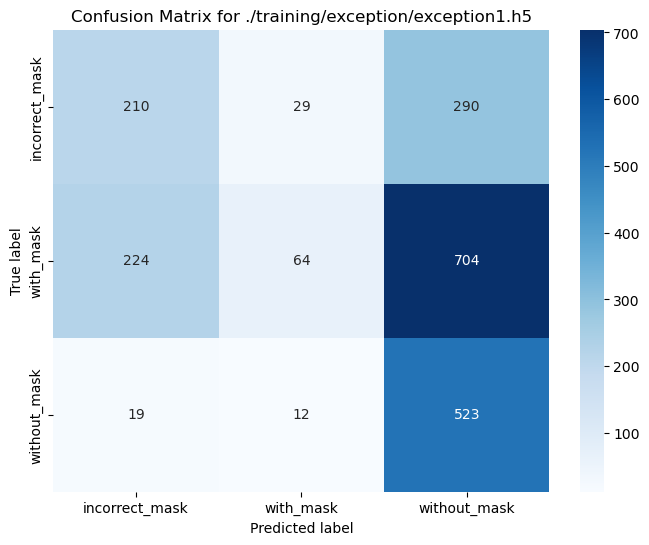

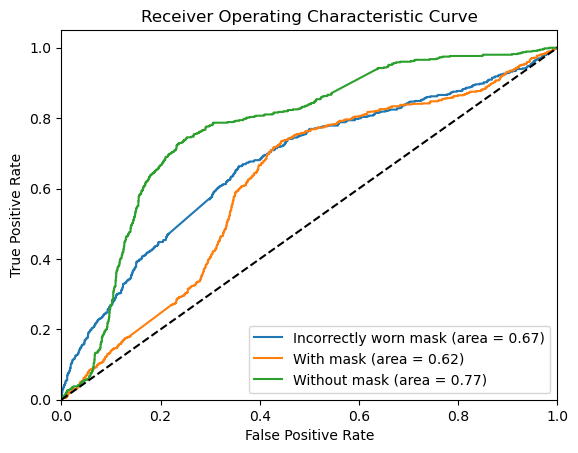

In [2]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model_paths = [
    './training/exception/exception1.h5'
]

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './latest-build/',
    target_size=(299, 299),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0,1,2])
    n_classes = y_true_bin.shape[1]
    classes = y_true_bin

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    custom_labels = ['Incorrectly worn mask', 'With mask', 'Without mask']

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{custom_labels[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
5086/5086 [==============================] - 638s 123ms/step - loss: 1.1187 - accuracy: 0.5631 - val_loss: 1.0055 - val_accuracy: 0.6592


In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Num GPUs Available:  1
